<center><u><H1>Kernel Principal Component Analysis(KPCA)</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
X.shape

(150, 4)

## Plotting the classes

Text(0, 0.5, 'Factor2')

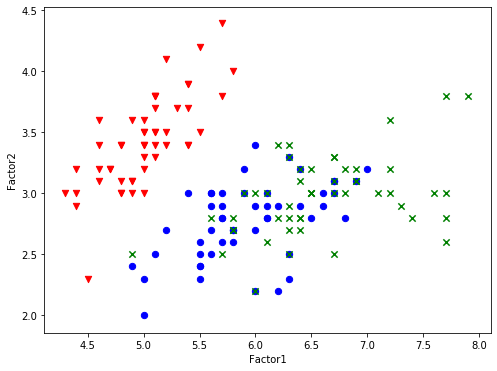

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=40, color= 'red', marker='v')
plt.scatter(X[y==1, 0], X[y==1, 1], s=40, color= 'blue', marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], s=40, color= 'green', marker='x')
plt.xlabel('Factor1')
plt.ylabel('Factor2')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

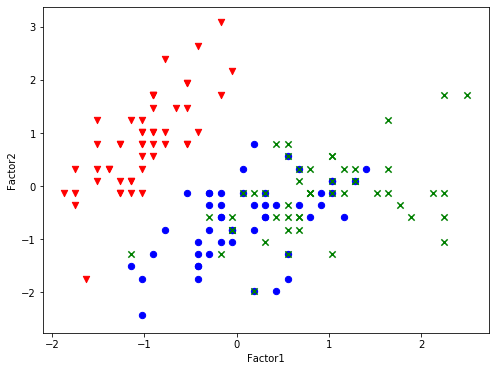

In [7]:
#Plotting Standardized data
plt.figure(figsize=(8,6))
plt.scatter(X_std[y==0, 0], X_std[y==0, 1], s=40, color= 'red', marker='v')
plt.scatter(X_std[y==1, 0], X_std[y==1, 1], s=40, color= 'blue', marker='o')
plt.scatter(X_std[y==2, 0], X_std[y==2, 1], s=40, color= 'green', marker='x')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.show()

In [8]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)

### n_components : int, default=None
Number of components. If None, all non-zero components are kept.

In [9]:
X_kpca = kpca.fit_transform(X_std)

## Plotting 2 Components

Text(0, 0.5, 'PC2')

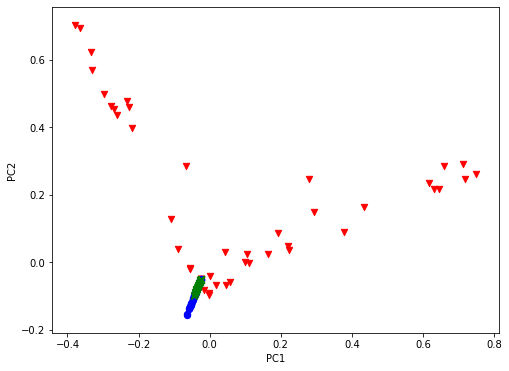

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], s=40, color= 'red', marker='v')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], s=40, color= 'blue', marker='o')
plt.scatter(X_kpca[y==2, 0], X_kpca[y==2, 1], s=40, color= 'green', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Plotting the main component

Text(0.5, 0, 'PC1')

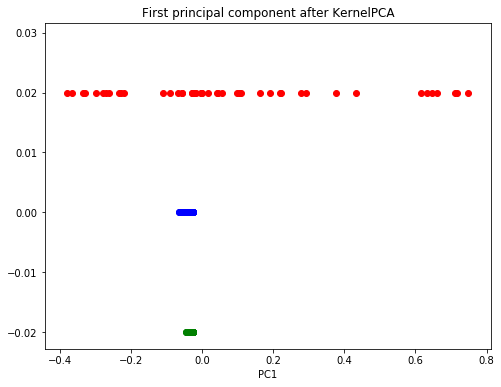

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red')
plt.scatter(X_kpca[y==1, 0], np.zeros((50,1)), color='blue')
plt.scatter(X_kpca[y==2, 0], np.zeros((50,1))-0.02, color= 'green')
plt.title('First principal component after KernelPCA')
plt.xlabel('PC1')

## Returning to original space:

In [12]:
X_back = kpca.inverse_transform(X_kpca)
X_back_std = sc.fit_transform(X_back)

Text(0, 0.5, 'Factor2')

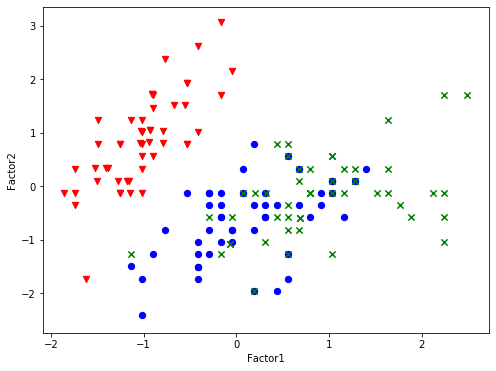

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_back_std[y==0, 0], X_back_std[y==0, 1], s=40, color= 'red', marker='v')
plt.scatter(X_back_std[y==1, 0], X_back_std[y==1, 1], s=40, color= 'blue', marker='o')
plt.scatter(X_back_std[y==2, 0], X_back_std[y==2, 1], s=40, color= 'green', marker='x')
plt.xlabel('Factor1')
plt.ylabel('Factor2')

## Make circles dataset

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.10, factor=0.2)

In [15]:
X.data.shape

(1000, 2)

In [16]:
y.data.shape

(1000,)

Text(0.5, 0, 'X0')

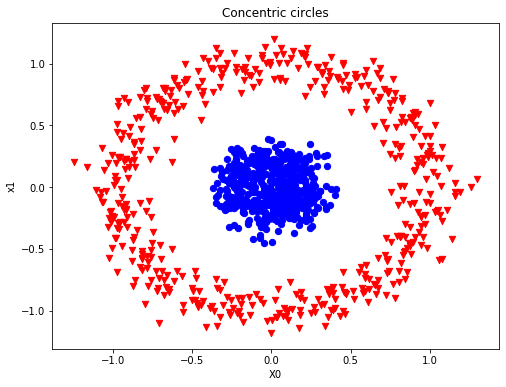

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=40, color='red', marker='v')
plt.scatter(X[y==1, 0], X[y==1, 1], s=40, color='blue', marker='o')
plt.title('Concentric circles')
plt.ylabel('x1')
plt.xlabel('X0')

In [18]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

## Plotting 2 Main Components

Text(0, 0.5, 'PC2')

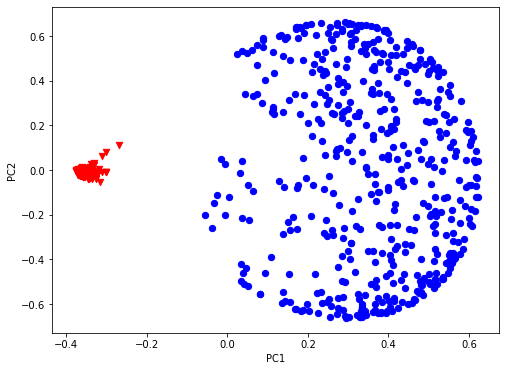

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], s=40, color= 'red', marker='v')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], s=40, color= 'blue', marker='o')

plt.xlabel('PC1')
plt.ylabel('PC2')

## Plotting the Main Component

Text(0.5, 0, 'PC1')

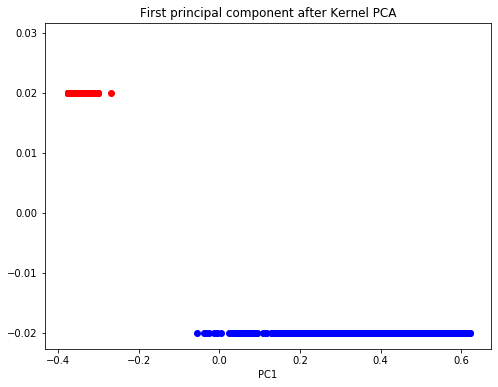

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red')
plt.scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue')

plt.title('First principal component after Kernel PCA')
plt.xlabel('PC1')

## Returning to original space

In [21]:
X_back = kpca.inverse_transform(X_kpca)

Text(0, 0.5, 'Y')

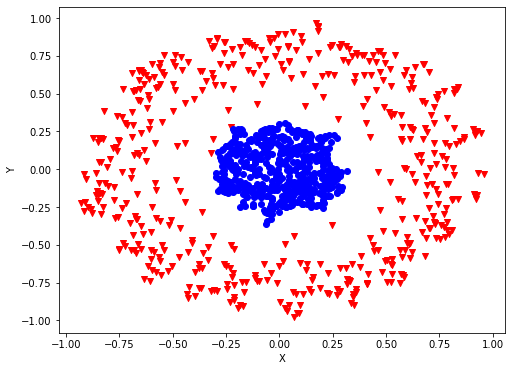

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_back[y==0, 0], X_back[y==0, 1], color= 'red', marker='v')
plt.scatter(X_back[y==1, 0], X_back[y==1, 1], color= 'blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')

## Reference:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py